<a href="https://colab.research.google.com/github/GabrielWateyma/Load-Pattern-Analysis-and-Demand-Optimization-at-Electric-Vehicle-Charging-Stations/blob/main/modelo_de_regresion_lineal_con_correlacion_negativa%2C_ayuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas is a powerful and popular library for data manipulation and analysis. It provides data structures like DataFrames

matplotlib is the foundational plotting library for Python. matplotlib.pyplot is a module within it that provides a simple, MATLAB-like interface for creating a wide variety of static, animated, and interactive plots.

seaborn is a library built on top of matplotlib. Its purpose is to make statistical data visualization easier and more attractive. It offers a high-level interface for drawing informative and aesthetically pleasing statistical graphics.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [138]:
print("--- Step 1: Loading Data from the CSV ---")
try:
    df = pd.read_csv('/content/station_data_dataverse.csv')
    print("The file '/content/station_data_dataverse.csv' has been loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found. Make sure it is in the same directory.")
    exit()

print("\nColumns of the loaded DataFrame:")
print(df.columns)

--- Step 1: Loading Data from the CSV ---
The file '/content/station_data_dataverse.csv' has been loaded successfully.

Columns of the loaded DataFrame:
Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')


In [139]:
# --- Exploratory Data Analysis (EDA) ---
print("\n--- Step 2: Exploratory Data Analysis (EDA) ---")

# --- Data Loading ---
print("--- Step 1: Data Loading ---")
try:
    df = pd.read_csv('/content/station_data_dataverse.csv')
    print("The file '/content/station_data_dataverse.csv' has been loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found. Make sure it is in the same directory.")
    exit()

print("\nColumns of the loaded DataFrame:")
print(df.columns)

# --- Exploratory Data Analysis (EDA) ---
print("\n--- Step 2: Exploratory Data Analysis (EDA) ---")

# 1. Descriptive Statistics
print("\n1. Initial look at the DataFrame (first 5 rows):")
print(df.head())

print("\n2. DataFrame Information (data types, null values):")
df.info()

print("\n3. Descriptive statistics for numerical columns:")
print(df.describe())


--- Step 2: Exploratory Data Analysis (EDA) ---
--- Step 1: Data Loading ---
The file '/content/station_data_dataverse.csv' has been loaded successfully.

Columns of the loaded DataFrame:
Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

--- Step 2: Exploratory Data Analysis (EDA) ---

1. Initial look at the DataFrame (first 5 rows):
   sessionId  kwhTotal  dollars              created                ended  \
0    1366563  7.780000 0.000000  0014-11-18 15:40:26  0014-11-18 17:11:04   
1    3075723  9.740000 0.000000  0014-11-19 17:40:26  0014-11-19 19:51:04   
2    4228788  6.760000 0.580000  0014-11-21 12:05:46  0014-11-21 16:46:04   
3    3173284  6.170000 0.000000  0014-12-03 19:16:12  0014-12-03 21:02:18   
4    3

count: The number of non-null values in each column.

Important observation: Look at the distance column. The count is 2,330, while in the others it's 3,395.

mean: The average value of the data in that column.

Example: The average energy consumed (kwhTotal) is 5.81 kWh.

std: The standard deviation. It measures the dispersion of the data with respect to the mean. A large std indicates that the data is very spread out.

min: The minimum value in the column.

25%: The first quartile. 25% of the data is below this value.

50%: The second quartile, which is the same as the median. 50% of the data is below this value. The median is useful because it is not affected by outliers.

75%: The third quartile. 75% of the data is below this value.

max: The maximum value in the column.


4. Visualization of kwhTotal distribution:


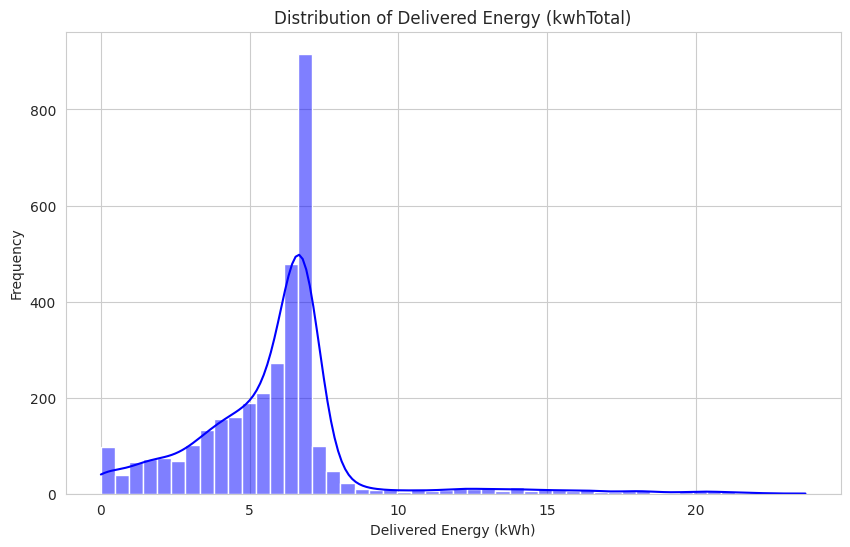

In [140]:
# 2. Visualize the distribution of key variables
print("\n4. Visualization of kwhTotal distribution:")
plt.figure(figsize=(10, 6))
sns.histplot(df['kwhTotal'], kde=True, bins=50, color='blue')
plt.title('Distribution of Delivered Energy (kwhTotal)')
plt.xlabel('Delivered Energy (kWh)')
plt.ylabel('Frequency')
plt.show()

Most charging sessions consume between 5 and 8 kWh.
There is a very clear peak around 6 kWh.
The distribution has a long tail to the right, which means there are some charging sessions that consume much more energy (up to 24 kWh), but they are much less frequent.
There seems to be a smaller peak near 0 kWh, which could be very short or canceled sessions.


5. Bar chart of the top 10 most used stations:


/tmp/ipython-input-2925575542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stations.index, y=top_10_stations.values, palette='viridis')


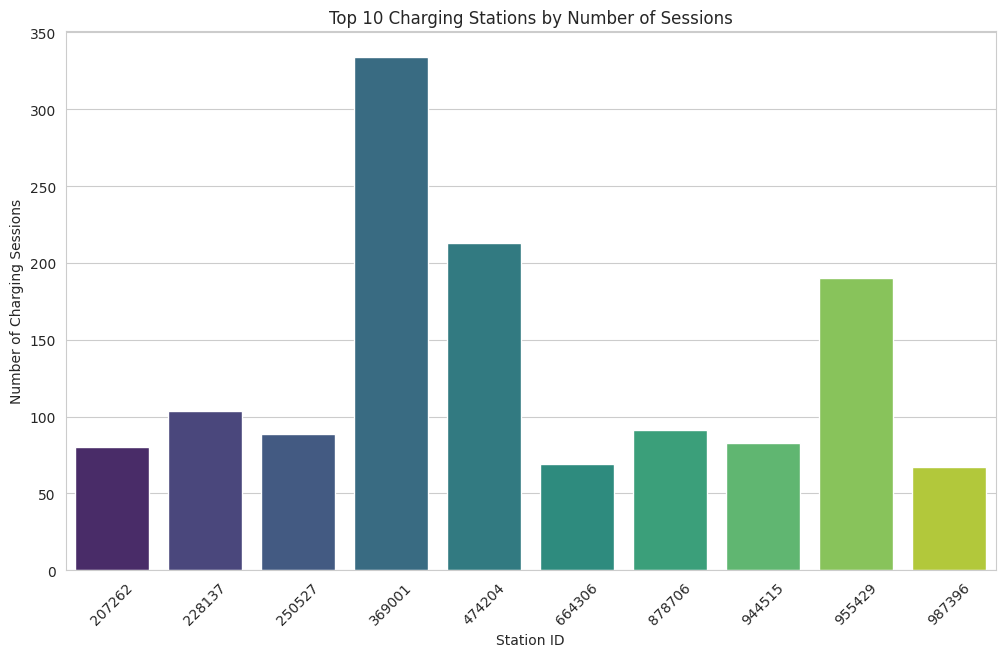

In [141]:
print("\n5. Bar chart of the top 10 most used stations:")
top_10_stations = df['stationId'].value_counts().nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_stations.index, y=top_10_stations.values, palette='viridis')
plt.title('Top 10 Charging Stations by Number of Sessions')
plt.xlabel('Station ID')
plt.ylabel('Number of Charging Sessions')
plt.xticks(rotation=45)
plt.show()

In [142]:
print("3. Time Series Analysis")

# The date columns, startTime and endTime, need to be converted
print("4. Converting time columns and calculating charge duration:")

# The CSV has a strange format where the year starts with 00 instead of 20, which must be corrected
df['created_fixed'] = df['created'].str.replace('^00', '20', regex=True)
df['ended_fixed'] = df['ended'].str.replace('^00', '20', regex=True)

# The columns must be converted to datetime
df['created_datetime'] = pd.to_datetime(df['created_fixed'], errors='coerce')
df['ended_datetime'] = pd.to_datetime(df['ended_fixed'], errors='coerce')

# Invalid data must be removed
invalid_dates_created = df['created_datetime'].isna().sum()
invalid_dates_ended = df['ended_datetime'].isna().sum()

print(f"Found {invalid_dates_created} invalid values in the 'created_datetime' column.")
print(f"Found {invalid_dates_ended} invalid values in the 'ended_datetime' column.")

3. Time Series Analysis
4. Converting time columns and calculating charge duration:
Found 0 invalid values in the 'created_datetime' column.
Found 0 invalid values in the 'ended_datetime' column.


In [143]:
# calculate the duration
df['duration'] = df['ended_datetime'] - df['created_datetime']
print(f"The 'duration' column has been created. Its mean is: {df['duration'].mean()}")

The 'duration' column has been created. Its mean is: 0 days 02:50:29.355522827



5. Visualization of delivered energy over time:


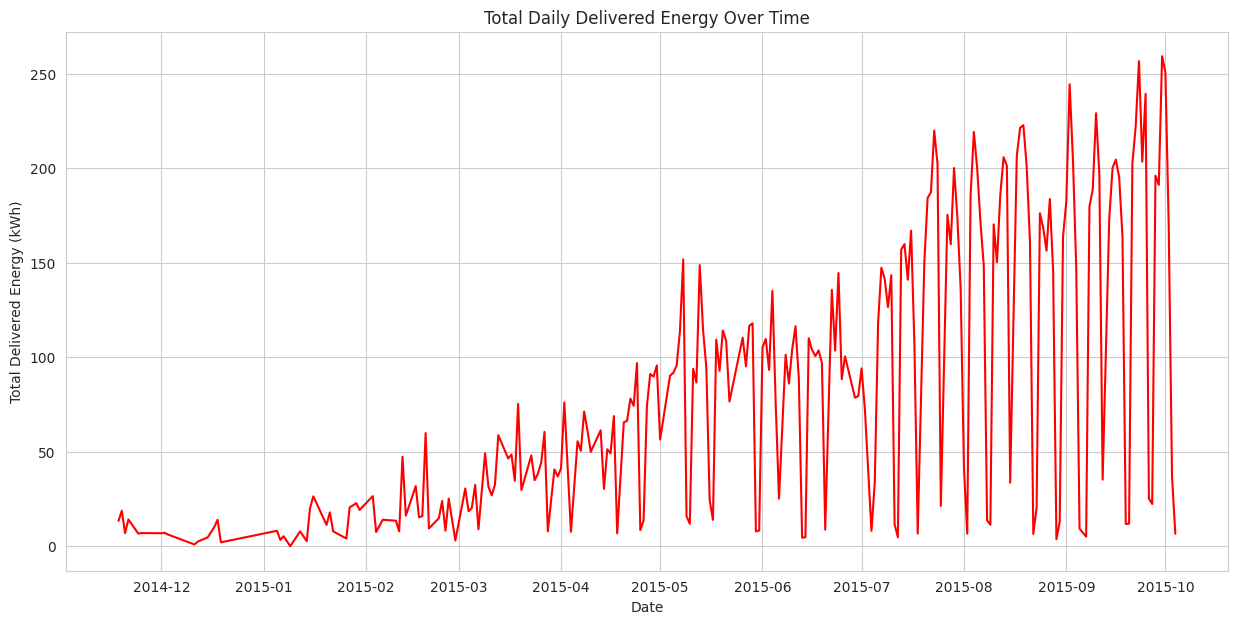


--- Preprocessing and Exploration Completed. ---


In [144]:
# time series plot
print("\n5. Visualization of delivered energy over time:")

df['date'] = df['created_datetime'].dt.date
daily_energy = df.groupby('date')['kwhTotal'].sum().reset_index()
daily_energy['date'] = pd.to_datetime(daily_energy['date'])

# Creating the plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=daily_energy, x='date', y='kwhTotal', color='red')
plt.title('Total Daily Delivered Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Total Delivered Energy (kWh)')
plt.show()

print("\n--- Preprocessing and Exploration Completed. ---")


--- Analysis by day of the week ---


/tmp/ipython-input-2518377714.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sessions_by_day.index, y=sessions_by_day.values, palette='viridis')


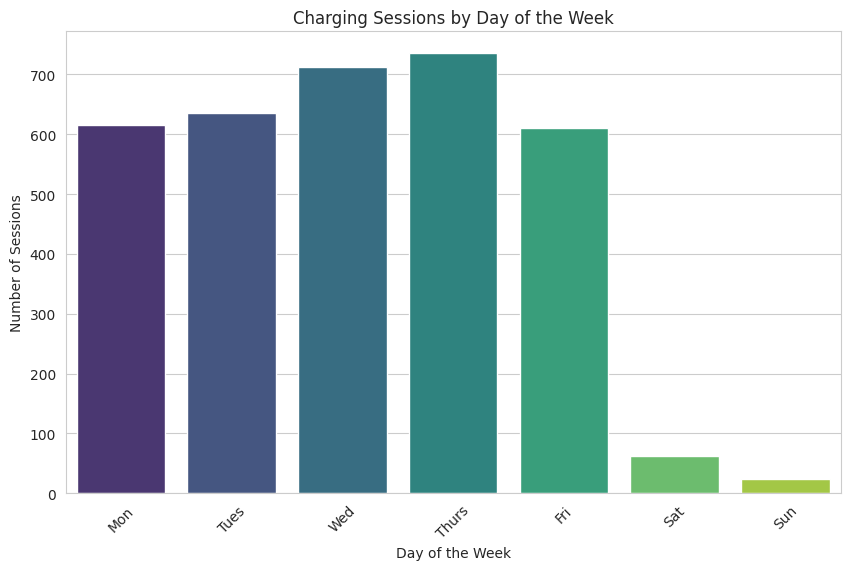

In [145]:
# analysis by day of the week
print("\n--- Analysis by day of the week ---")

# columns for the days of the week
weekdays = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# total sessions per day of the week
sessions_by_day = df[weekdays].sum()

# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sessions_by_day.index, y=sessions_by_day.values, palette='viridis')
plt.title('Charging Sessions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()


In [146]:
# find correlations

correlation_data = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

correlation_matrix = df[correlation_data].corr()

print(correlation_matrix)

            Mon      Tues       Wed     Thurs       Fri       Sat       Sun
Mon    1.000000 -0.225828 -0.242751 -0.247485 -0.220343 -0.064213 -0.039726
Tues  -0.225828  1.000000 -0.247313 -0.252136 -0.224484 -0.065420 -0.040472
Wed   -0.242751 -0.247313  1.000000 -0.271031 -0.241306 -0.070322 -0.043505
Thurs -0.247485 -0.252136 -0.271031  1.000000 -0.246011 -0.071694 -0.044354
Fri   -0.220343 -0.224484 -0.241306 -0.246011  1.000000 -0.063831 -0.039489
Sat   -0.064213 -0.065420 -0.070322 -0.071694 -0.063831  1.000000 -0.011508
Sun   -0.039726 -0.040472 -0.043505 -0.044354 -0.039489 -0.011508  1.000000


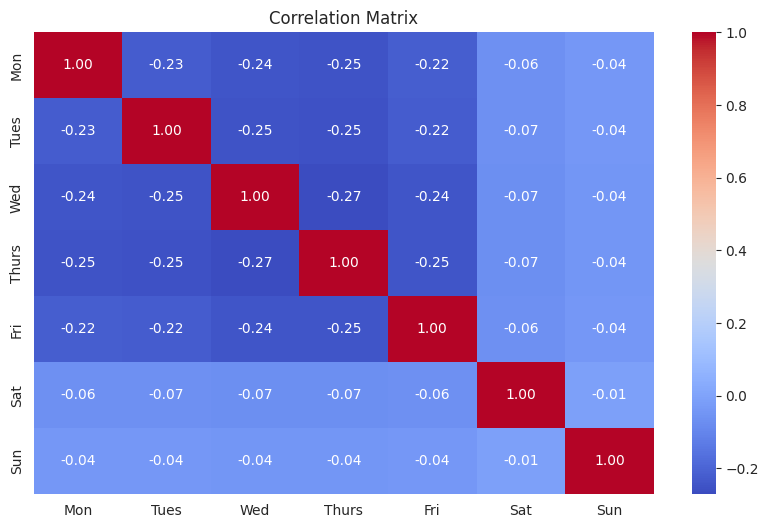

In [147]:
# plot
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [148]:
# predictive model using linear regression
print("\n--- Predictive Model using Linear Regression ---")

# import of necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


--- Predictive Model using Linear Regression ---


In [149]:
# duration needs to be in seconds
df['duration_seconds'] = df['duration'].dt.total_seconds()

model_df = df[['duration_seconds', 'kwhTotal']].dropna()

print(model_df.head())

   duration_seconds  kwhTotal
0      5,438.000000  7.780000
1      7,838.000000  9.740000
2     16,818.000000  6.760000
3      6,366.000000  6.170000
4      1,075.000000  0.930000


In [150]:
# the x and y variables are defined as

X = model_df[['duration_seconds']]
y = model_df['kwhTotal']

In [151]:
# one part of our data is used to train the model and another to test it, a ratio of 80/20 will be used

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split: {len(X_train)} for training, {len(X_test)} for testing.")

Data split: 2716 for training, 679 for testing.


In [152]:
# linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [153]:
# the model is tested
y_pred = model.predict(X_test)

# test metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Coefficient of Determination (R²): {r2:,.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 9.89
Coefficient of Determination (R²): -0.29


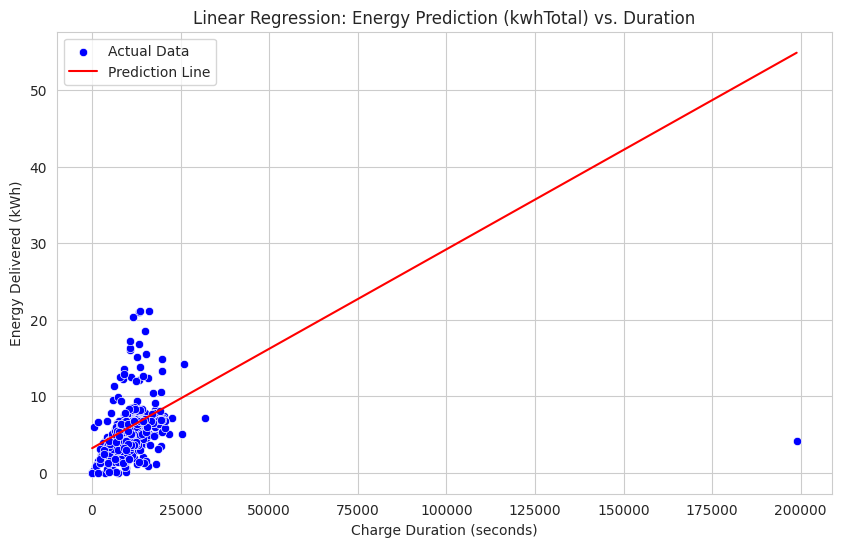

In [154]:
# results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['duration_seconds'], y=y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test['duration_seconds'], y=y_pred, color='red', label='Prediction Line')
plt.title('Linear Regression: Energy Prediction (kwhTotal) vs. Duration')
plt.xlabel('Charge Duration (seconds)')
plt.ylabel('Energy Delivered (kWh)')
plt.legend()
plt.show()